In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C175P136NThinF_IMG_20151127_142326_cell_236.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C84P45ThinF_IMG_20150818_101146_cell_93.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C170P131ThinF_IMG_20151119_120111_cell_237.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C176P137NThinF_IMG_20151201_122444_cell_125.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C99P60ThinF_IMG_20150918_141857_cell_15.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C129P90ThinF_IMG_20151004_134944_cell_28.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C68P29N_ThinF_IMG_20150819_134112_cell_138.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C99P6

In [2]:
img_class = os.listdir("../input/cell-images-for-detecting-malaria/cell_images/cell_images")
print(img_class)
# Uninfected 13780
# Parasitized 13780
# ['Uninfected', 'Parasitized']

['Parasitized', 'Uninfected']


In [3]:
pip install split-folders

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
base_path = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/'
print(os.listdir(base_path))
print(f'Total Parasitized images {len(os.listdir(os.path.join(base_path, "Parasitized")))}')
print(f'Total Uninfected images {len(os.listdir(os.path.join(base_path, "Uninfected")))}')

['cell_images', 'Parasitized', 'Uninfected']
Total Parasitized images 13780
Total Uninfected images 13780


In [5]:
# splitting the data into train, validation and test set
import splitfolders
os.mkdir('images')  # directory to store the Training, Validation and Testing datasets
input_folder = os.path.join(base_path, 'cell_images')
output_folder = 'images'
splitfolders.ratio(input_folder, output=output_folder, seed=10, ratio=(.85, .10, .05), group_prefix=None) # default values

Copying files: 27560 files [08:08, 56.37 files/s]


In [6]:
# checking the newly created directory structure
input_path = 'images'
for folder in os.listdir(input_path):
    print(folder)
    print(os.listdir(os.path.join(input_path, folder)))

test
['Parasitized', 'Uninfected']
train
['Parasitized', 'Uninfected']
val
['Parasitized', 'Uninfected']


In [7]:
train_dir = os.path.join(input_path, 'train')
test_dir = os.path.join(input_path, 'test')
val_dir = os.path.join(input_path, 'val')

train_Parasitized_dir = os.path.join(train_dir, 'Parasitized')
train_Uninfected_dir = os.path.join(train_dir, 'Uninfected')

validation_Parasitized_dir = os.path.join(val_dir, 'Parasitized')
validation_Uninfected_dir = os.path.join(val_dir, 'Uninfected')

test_Parasitized_dir = os.path.join(test_dir, 'Parasitized')
test_Uninfected_dir = os.path.join(test_dir, 'Uninfected')

In [8]:
print('total training Parasitized images :', len(os.listdir(train_Parasitized_dir) ))
print('total training Uninfected images :', len(os.listdir(train_Uninfected_dir) ))

print('total validation Parasitized images :', len(os.listdir(validation_Parasitized_dir) ))
print('total validation Uninfected images :', len(os.listdir(validation_Uninfected_dir) ))

print('total test Parasitized images :', len(os.listdir(test_Parasitized_dir) ))
print('total test Uninfected images :', len(os.listdir(test_Uninfected_dir) ))

total training Parasitized images : 11713
total training Uninfected images : 11713
total validation Parasitized images : 1378
total validation Uninfected images : 1378
total test Parasitized images : 689
total test Uninfected images : 689


In [9]:
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
print("Tensorflow version " + tf.__version__)

from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, SeparableConv2D, BatchNormalization, MaxPool2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.vgg19 import VGG19

Tensorflow version 2.3.0


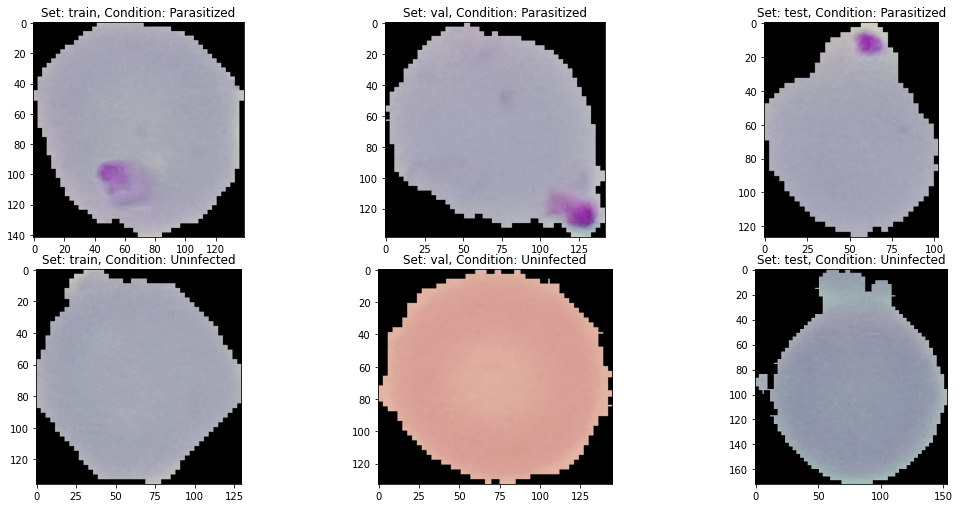

In [10]:
input_path = 'images/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/Parasitized/'+os.listdir(set_path+'/Parasitized')[0]))
    ax[i].set_title('Set: {}, Condition: Parasitized'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/Uninfected/'+os.listdir(set_path+'/Uninfected')[0]))
    ax[i+3].set_title('Set: {}, Condition: Uninfected'.format(_set))

In [11]:
# defining some fixed parameters
image_shape = [224, 224]
batch_size = 64
epochs = 30

# total number of train and validation images
training_img_count = len(os.listdir(train_Parasitized_dir) ) + len(os.listdir(train_Uninfected_dir) )     
validation_img_count = len(os.listdir(validation_Parasitized_dir) ) + len(os.listdir(validation_Uninfected_dir) )

print(f'total training images: {training_img_count}')
print(f'total training images: {validation_img_count}')

total training images: 23426
total training images: 2756


In [12]:
# instantiating the VGG19 model
vgg19 = VGG19(input_shape=(image_shape[0], image_shape[1], 3),
                  weights='imagenet', # include the pre-trained weights on ImageNet
                  include_top=False)  # to use our own input and get the desired output

# do not train the existing weights
for layer in vgg19.layers:
  layer.trainable = False

# defining input and output to the model
x = tf.keras.layers.Flatten()(vgg19.output)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs = vgg19.input, outputs = output)

80142336/80134624 [==============================] - 1s 0us/step


In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (image_shape[0], image_shape[1]),
                                                    batch_size = batch_size,
                                                    class_mode = 'binary',
                                                    shuffle = True
                                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                  target_size = (image_shape[0], image_shape[1]),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary',
                                                  shuffle = True
                                                 )

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (image_shape[0], image_shape[1]),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary',
                                                  shuffle = True)


Found 23424 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.
Found 1378 images belonging to 2 classes.


In [14]:
metrics = ['accuracy',
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall')
          ]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = metrics)

# stop model training is the validation loss does not decrease for 5 epochs
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                              patience=10,
                                              verbose=1,
                                              mode="auto",
                                              restore_best_weights=True
)

# reducing the learning rate every 5 epochs
import math
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.1
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(step_decay, verbose=1)

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='malaria.h5', 
                                                monitor='val_loss', 
                                                verbose=1, 
                                                save_best_only=True,
                                                save_weights_only=False, 
                                                mode='min', 
                                                save_freq='epoch'
)

In [15]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=training_img_count // batch_size,
                    epochs=epochs,
                    validation_steps=validation_img_count // batch_size,
                    callbacks=[early_stop, lr_scheduler, checkpoint],
                    verbose=2
                    )


Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
Epoch 1/30

Epoch 00001: val_loss improved from inf to 0.30465, saving model to malaria.h5
366/366 - 82s - loss: 0.3975 - accuracy: 0.8271 - precision: 0.8111 - recall: 0.8526 - val_loss: 0.3047 - val_accuracy: 0.8648 - val_precision: 0.7988 - val_recall: 0.9753

Epoch 00002: LearningRateScheduler reducing learning rate to 0.001.
Epoch 2/30

Epoch 00002: val_loss improved from 0.30465 to 0.28264, saving model to malaria.h5
366/366 - 82s - loss: 0.2626 - accuracy: 0.8982 - precision: 0.8774 - recall: 0.9257 - val_loss: 0.2826 - val_accuracy: 0.8888 - val_precision: 0.9511 - val_recall: 0.8196

Epoch 00003: LearningRateScheduler reducing learning rate to 0.001.
Epoch 3/30

Epoch 00003: val_loss improved from 0.28264 to 0.21257, saving model to malaria.h5
366/366 - 82s - loss: 0.2273 - accuracy: 0.9138 - precision: 0.8956 - recall: 0.9367 - val_loss: 0.2126 - val_accuracy: 0.9211 - val_precision: 0.9101 - val_recall: 0.9

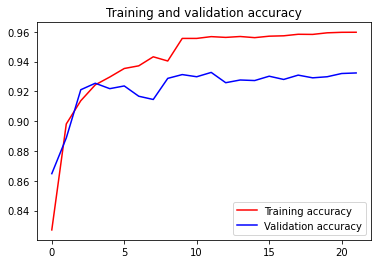

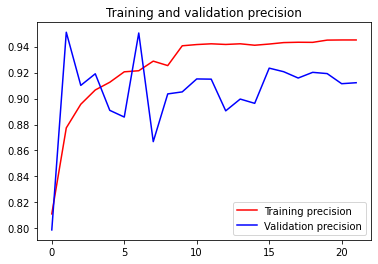

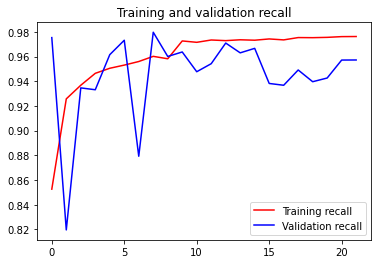

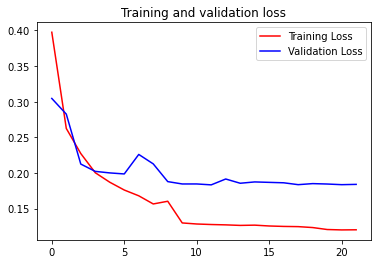

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
precision = history.history['precision']
val_precision = history.history['val_precision']
recall = history.history['recall']
val_recall = history.history['val_recall']


epochs = range(len(acc))
plt.figure()

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, precision, 'r', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.legend()

plt.figure()

plt.plot(epochs, recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
# load the saved model
saved_model = tf.keras.models.load_model('malaria.h5')

In [18]:
model_test_performace = saved_model.evaluate(test_generator)

22/22 [==============================] - 5s 216ms/step - loss: 0.1778 - accuracy: 0.9369 - precision: 0.9216 - recall: 0.9550


In [19]:
test_accuracy = model_test_performace[1]
test_precision = model_test_performace[2]
test_recall = model_test_performace[3]

print(f'Test accuracy: {round(test_accuracy*100, 2)}%')
print(f'Test precision: {round(test_precision*100, 2)}%')
print(f'Test recall: {round(test_recall*100, 2)}%')

Test accuracy: 93.69%
Test precision: 92.16%
Test recall: 95.5%
